# Quantum Computing: Exploring Deutsch's Algorithm

*Jakub Prochnicki G00373793*

---

# Table of Contents
1. [Introduction To Quantum Computing](#intro)
2. [Key Quantum Concepts](#concepts)
3. [Deutsch's Algorithm: The Oracle Problem](#oracle)
4. [Implementing Deutsch's Algorithm in Qiskit](#implementation)
5. [Conclusion](#conclusion)


---


<a id="intro"></a>
## **What is Quantum Computing and How does it compare to Classical Computers?**

"Quantum computing is a rapidly-emerging technology that harnesses the laws of quantum mechanics to solve problems too complex for classical computers."  [1] 

### *Classical Computers*

Classical Computers like a laptop process information using bits. A bit can be taught of as a switch with two states: 0 and 1, which in simple terms means off or on. These bits are used to represent all the calculations in a classical computer.

### *Quantum Computers*

In Quantum Computers, calculations are done using quantum bits(qubits). These Qubits are explained in the section below.



<a id="concepts"></a>
## **Key Quantum Concepts**


### *Qubits*

"A quantum bit is any bit made out of a quantum system, like an electron or photon"[2]. Qubits can be in any hybrid position of 0 and 1, meaning they can either be 0 or 1, or a combination of both. This is known as superposition. Superposition is a quantum concept that allows qubits to exist in multiple states simultaneously. This concept allows quantum computers to perform certain computations more efficiently.


### *Quantum Superposition*

Superposition is a fundamental principle of quantum mechanics. It is part of what sets a qubit apart from a classical bit. This property allows qubits to represent a combination of 0 and 1 at the same time while classical bits only represent either 0 or 1. When a quantum system in superposition is measured, it collapses to one of its eigenstates and provides a single outcome. [3]



### *Hammard Gates*


A Hadammard gate is a fundamental quantum gate that creates a superposition state and equally splits the probability between the |0⟩ and |1⟩ states. It's necessary in quantum computing for generating superpositions.

### *Oracle*

In the context of the problem I am going to be exploring in this notebook, an oracle is essentially an operation that has some property that you don't know, and are trying to find out. The term "black box" is used to simplify that it's just a box that you can't see inside of, and therefore don't know what it's doing. All we know is that it can receive input and produce output. I will be demonstrating an oracle in action during the steps of implementing Deutsch's Algorithm in Qiskit.

<a id="oracle"></a>
# **Deutsch's Algorithm**

Deutsch's Algorithm was proposed by David Deutsch in 1985 in order to demonstrate the computational speedup of quantum computers compared to classical computer for certain tasks. It indicates that quantum computers could be more powerful than classical computers. It is one of the earliest algorithms to explore this idea. 

### *The Oracle Problem*

You are given a function of $f(x)$.The function is hidden and what it does is not disclosed. This function takes in a list of bits (0 or a 1) and returns either a 0 or a 1, based on the input. The aim of the problem is to determine whether the  function is either a constant or a balanced function. [4]

$f : \{0,1\} \rightarrow \{0,1\}$

*A constant function* is a function that always returns the same value no matter what input it is given. We can see this in the table below. The constant function always returns 0, whether the input is 0 or 1.

$\begin{array}{|c|c|}
\hline
\text{Input (x)} & \text{Output (f1(x))} \\
\hline
0 & 0 \\
\hline
1 & 0 \\
\hline
\end{array}$

*A balanced function* is a function that returns 0 for half of the inputs and 1 for the other half. We can see in the table below that this function returns 0 when the input is 0 and returns 1 when the input is 1.

$\begin{array}{|c|c|}
\hline
\text{Input (x)} & \text{Output (f2(x))} \\
\hline
0 & 0 \\
\hline
1 & 1 \\
\hline
\end{array}$




### *Classical Computer Solution*


In [4]:
# will always return 0
def constant(x):
    return 0  

# will return 0 if input is 0, will return 1 if input is 1
def balanced(x):
    return x  

def determine_function(f):
    if f(0) == f(1):
        return "Constant"
    else:
        return "Balanced"

# test functions
print(determine_function_type(constant_function))  
print(determine_function_type(balanced_function))  

Constant
Balanced


<a id="implement"></a>
# **Implementing Deutsch's Algorithm in Qiskit**

## *Step 1: Initialization*

The first step of implementing the Deutsch's Algorithm in Qiskit is initialization. During this stage, I am initializing two qubits. The first qubit is initialized in the state ∣0⟩, and the second qubit is initialized in the state ∣1⟩.

## *Step 2: Superposition*

In this step, I am applying a Hammard Gate to both qubits, which puts them in a state of superposition. This means that they are in a combination of all possible states.

## *Step 3: Oracle Application*
 
In this step, I am applying the oracle function, $( U_f )$, to both qubits. The oracle is a black-box quantum operation that knows how to compute the function $f(x)$. If $f(x)$ is constant, it leaves the first qubit unchanged; if $f(x)$ is balanced, it flips the first qubit.


## *Step 4: Interference*

In this step, I am applying a hammard gate to the first qubit. This causes interference and causes the quantum states to combine in ways that extract the property of the function.

## *Step 5: Measurement*

Here I am measuring the first qubit. We can determine the type of function by looking at the state of the qubit.

- If the first qubit is observed in the state $|0\rangle$ , then the function $(f)$ is constant.

-  If it is in the state $|1\rangle$ , then the function $(f)$ is balanced.

### *Putting it all together*

Below I have put the steps together and implemented the algorithm. [5]

In [2]:
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import  plot_histogram
from qiskit.visualization import circuit_drawer

def deutsch_algorithm(function_type):
    
    # STEP 1
    # creating a quantum circuit consisting of two qubits and a classical register of 1
    circuit = QuantumCircuit(2,1)

    # changing the state of the first qubit to ∣1⟩
    circuit.x(1)

    circuit.barrier()

    # STEP 2
    # applying hammard gate to both qubits
    circuit.h(0)
    circuit.h(1)

    circuit.barrier()

    # STEP 3
    # creating the oracle
    if function_type == "balanced":
        # apply cnot gate and flip the first qubit
        circuit.cx(0, 1)
    elif function_type == "constant":
        # leave qubit unchanged if function is constant
        pass
    
    # STEP 4
    # applying hammard gate
    circuit.h(0)
    
    # STEP 5
    # measuring the first qubit
    circuit.measure(0,0)

    return circuit

### *Constant Circuit*

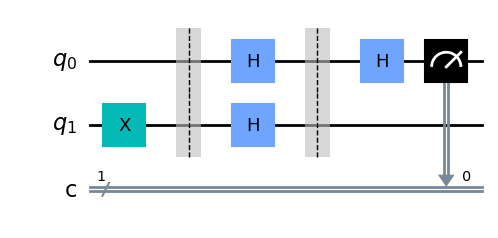

In [5]:

constant_function = deutsch_algorithm('constant')
constant_function.draw(output='mpl')

### *Balanced Circuit*

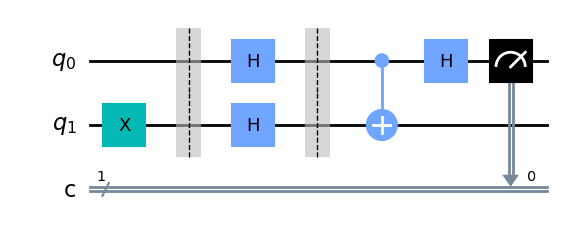

In [4]:

balanced_function = deutsch_algorithm('balanced')
balanced_function.draw(output='mpl')

## *Simulating the Circuit*

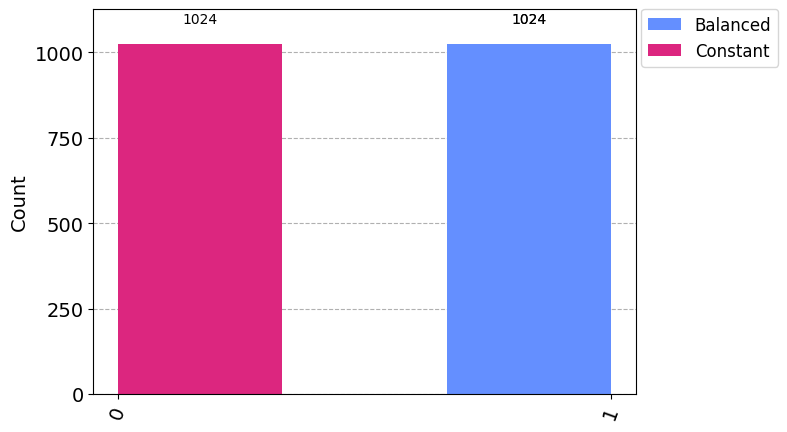

In [5]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

# setting up the qasm simulator from the Aer package
simulator = Aer.get_backend('qasm_simulator')

# simulate for a balanced function
balanced_circuit = deutsch_algorithm("balanced")
# running the quantum circuit
balanced_job = execute(balanced_circuit, simulator, shots=1024)
# receiving the result from running the quantum circuit 
balanced_result = balanced_job.result()
# receiving the counts from the result
balanced_counts = balanced_result.get_counts(balanced_circuit)

# repeat for constant function
constant_circuit = deutsch_algorithm("constant")
constant_job = execute(constant_circuit, simulator, shots=1024)
constant_result = constant_job.result()
constant_counts = constant_result.get_counts(constant_circuit)

# render results in histogram
plot_histogram([balanced_counts, constant_counts], legend=['Balanced', 'Constant'])

<a id="conclusion"></a>
## Conclusion

From Looking at the simulation of the circuit, we can take away the following:

- The algorithm always results in 0 for a **constant function** as the transformation applied by the oracle doesn't change the superposition state created by the initial Hammard gates in a way that affects the result.

- For a **balanced function**, the algorithm will always result 1. This is because the balanced oracle creates a phase kickback which alters the superposition state of the first qubit.

They **key take away** here is the efficacy of the Algorithm. In classical computing, like demonstrated earlier in the notebook, determining whether a function is balanced or constant requires two evaluations. This is where Deutsch's Algorithm showcases a quantum advantage, as it only requires one evaluation.


# **References**
---
[1] : https://www.ibm.com/topics/quantum-computing

[2] : https://uwaterloo.ca/institute-for-quantum-computing/quantum-101/quantum-information-science-and-technology/what-qubit

[3] : https://www.quantum-inspire.com/kbase/superposition-and-entanglement/

[4] : https://people.vcu.edu/~sgharibian/courses/CMSC491/notes/Lecture%206%20-%20Deutsch's%20algorithm.pdf

[5] : https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/